In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

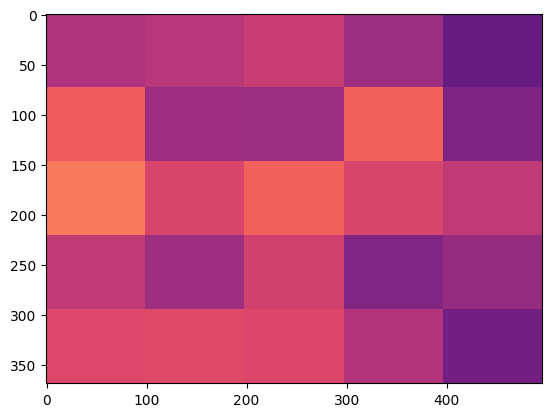

In [3]:
img = image.load_img("train/ripe/ripe_heatmap_ripe_durian_sensor_data_1.png")
plt.imshow(img)

In [4]:
cv2.imread("train/ripe/ripe_heatmap_ripe_durian_sensor_data_1.png")

array([[[124,  52, 173],
        [124,  52, 173],
        [124,  52, 173],
        ...,
        [128,  27, 103],
        [128,  27, 103],
        [128,  27, 103]],

       [[124,  52, 173],
        [124,  52, 173],
        [124,  52, 173],
        ...,
        [128,  27, 103],
        [128,  27, 103],
        [128,  27, 103]],

       [[124,  52, 173],
        [124,  52, 173],
        [124,  52, 173],
        ...,
        [128,  27, 103],
        [128,  27, 103],
        [128,  27, 103]],

       ...,

       [[105,  72, 220],
        [105,  72, 220],
        [105,  72, 220],
        ...,
        [129,  31, 114],
        [129,  31, 114],
        [129,  31, 114]],

       [[105,  72, 220],
        [105,  72, 220],
        [105,  72, 220],
        ...,
        [129,  31, 114],
        [129,  31, 114],
        [129,  31, 114]],

       [[105,  72, 220],
        [105,  72, 220],
        [105,  72, 220],
        ...,
        [129,  31, 114],
        [129,  31, 114],
        [129,  31, 114]]

In [5]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

In [6]:
train_dataset = train.flow_from_directory('train/', target_size=(200,200), batch_size=3, class_mode='binary')
test_dataset = train.flow_from_directory('test/', target_size=(200,200), batch_size=3, class_mode='binary')


Found 140 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [7]:
train_dataset.class_indices

{'ripe': 0, 'unripe': 1}

In [8]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200,200,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Dropout(0.2),  # Add dropout layer
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Dropout(0.2),  # Add dropout layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Dropout(0.2),  # Add dropout layer
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Add dropout layer
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [10]:
model.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics=['accuracy'])

In [11]:
model_fit = model.fit(train_dataset, epochs=10, validation_data=test_dataset) 

Epoch 1/10
47/47 [==============================] - 33s 674ms/step - loss: 0.5540 - accuracy: 0.8357 - val_loss: 0.0552 - val_accuracy: 1.0000
Epoch 2/10
47/47 [==============================] - 27s 575ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.0048 - val_accuracy: 1.0000
Epoch 3/10
47/47 [==============================] - 28s 589ms/step - loss: 0.1127 - accuracy: 0.9714 - val_loss: 0.0090 - val_accuracy: 1.0000
Epoch 4/10
47/47 [==============================] - 27s 574ms/step - loss: 4.4787e-04 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 5/10
47/47 [==============================] - 27s 570ms/step - loss: 9.1451e-05 - accuracy: 1.0000 - val_loss: 4.6867e-04 - val_accuracy: 1.0000
Epoch 6/10
47/47 [==============================] - 27s 566ms/step - loss: 0.0579 - accuracy: 0.9857 - val_loss: 4.1478e-04 - val_accuracy: 1.0000
Epoch 7/10
47/47 [==============================] - 26s 564ms/step - loss: 1.0375e-05 - accuracy: 1.0000 - val_loss: 3.7892e-0

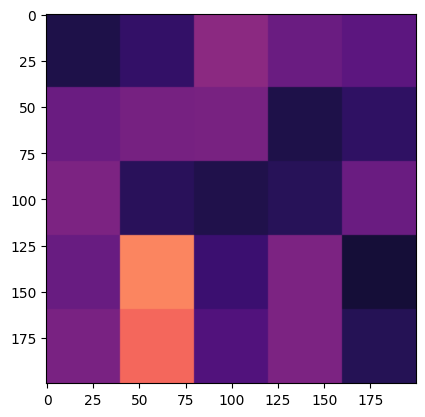

1/1 [==============================] - 0s 86ms/step
unripe


In [34]:
dir_val = 'validation'
model_input_shape = (200, 200)

# Specify the filename of the image you want to predict
image_filename = '4.png'  # Replace with the actual filename

# Load and resize the image
img_path = os.path.join(dir_val, image_filename)
img = image.load_img(img_path, target_size=model_input_shape)
plt.imshow(img)
plt.show()

# Convert the image to a numpy array
X = image.img_to_array(img)
X = np.expand_dims(X, axis=0)



# # Make predictions
val = model.predict(X)

# # Print the result
if val[0][0] == 0:
    print('ripe')
else:
    print('unripe')

In [ ]:
# this code is to loop all the validation image
# for i in os.listdir(dir_val):
#     img_path = os.path.join(dir_val, i)
    
#     # Load and resize the image
#     img = image.load_img(img_path, target_size=model_input_shape)
#     plt.imshow(img)
#     plt.show()
    
#     # Convert the image to a numpy array
#     X = image.img_to_array(img)
#     X = np.expand_dims(X, axis=0)
    
#     # Make predictions
#     val = model.predict(X)
    
#     # Print the result
#     if val[0][0] == 0:
#         print('ripe')
#     else:
#         print('unripe')

In [13]:
# model.save('saved_model')

INFO:tensorflow:Assets written to: saved_model\assets


INFO:tensorflow:Assets written to: saved_model\assets


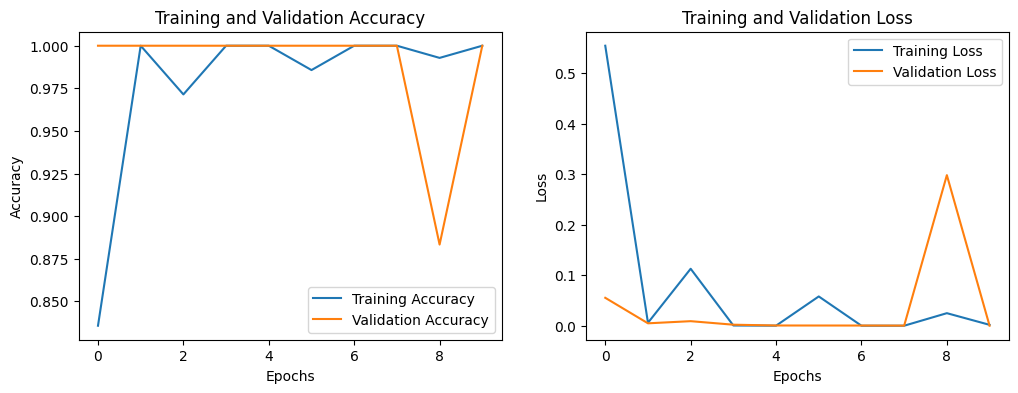

In [31]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(model_fit.history['accuracy'], label='Training Accuracy')
plt.plot(model_fit.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(model_fit.history['loss'], label='Training Loss')
plt.plot(model_fit.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()